In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from copy import deepcopy


def pythonSolution(n):
    """
    Uses numpy's matrix equation solver to find the solution to Ax=1
    where A is the tridiagonal matrix with 2 on the main diagonal and
    -1 on the adjacient diagonals.
    """
    L = [[0 for i in range(n)] for j in range(n)]
    for i in range (1, n):
        L[i][i-1]=-1
    for i in range (n-1):
        L[i][i+1]=-1
    for i in range(n):
        L[i][i]=2
    c=[1 for i in range(n)]
    
    return(np.linalg.solve(L, c))

def jacobi(m,N):
    """
    Computes equation Ax=1 using the Jacobi iterative method with N iterations
    for the 2m-1x2m-1 dimension matrix A, where A is the tridiagonal 
    matrix with 2 on the main diagonal and -1 on the adjacient diagonals.
    """
    n=2*m-1
    x=[0 for i in range(n)]
    norms=[0 for i in range (N)]
    for k in range (N):
        y=deepcopy(x)
        for i in range(n):
            if (i==0):
                x[i]=(y[i+1]+1)/2
            elif(i==(n-1)):
                x[i]=(y[i-1]+1)/2
            else:
                x[i]= (y[i-1]+y[i+1]+1)/2
        # save the 2-norm error from the true solution
        norms[k]=norm(np.array(x)-pythonSolution(n))
        
    return (x, norms)
    
def gaussSiedel(m, N):
    """
    Computes equation Ax=1 using the Gauss-Siedel iterative method with N iterations
    for the 2m-1x2m-1 dimension matrix A, where A is the tridiagonal 
    matrix with 2 on the main diagonal and -1 on the adjacient diagonals.
    """
    n=2*m-1
    x=[0 for i in range(n)]
    norms=[0 for i in range (N)]
    for k in range (N):
        for i in range(n):
            if (i==0):
                x[i]=(x[i+1]+1)/2
            elif(i==(n-1)):
                x[i]=(x[i-1]+1)/2
            else:
                x[i]= (x[i-1]+x[i+1]+1)/2
        # save the 2-norm error from the true solution
        norms[k]=norm(np.array(x)-pythonSolution(n))
        
    return (x, norms)
    

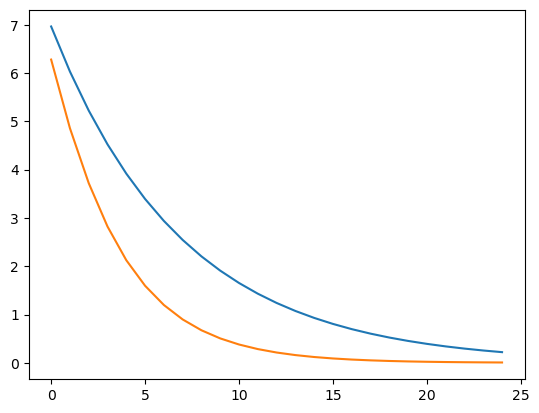

In [2]:
#Plot Jacobi (blue) vs Gauss-Seidel (Orange)
n=3
N=25
plt.plot(jacobi(n, N)[1])
plt.plot(gaussSiedel(n, N)[1])

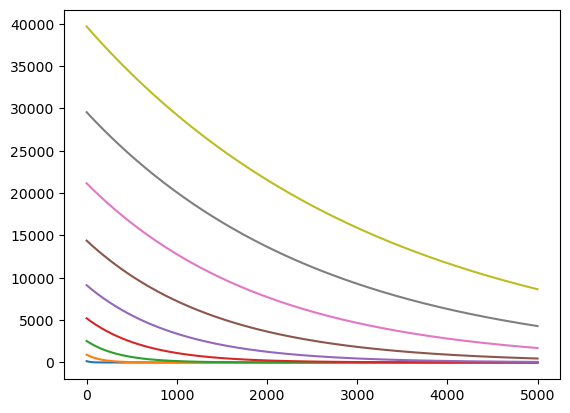

In [3]:
#plot Gauss-Siedel at different m's
N=5000
for i in range(1, 10):
    plt.plot(gaussSiedel(10*i, N)[1])

In [1]:
#plot Jacobi at different m's
N=5000
for i in range(1, 10):
    plt.plot(jacobi(10*i, N)[1])

NameError: name 'plt' is not defined